In [5]:
import requests
session = requests.session()
URL = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    "action": "opensearch",
    "namespace": "2",
    "search": "cat",
    "limit": "5",
    "format": "json"
}
API = session.get(url = URL, params = PARAMS)
print(API.json())

['cat', ['User:CatcherStorm', 'User:Catfish Jim and the soapdish', 'User:CataracticPlanets', 'User:Catgut', 'User:Catchpole'], ['', '', '', '', ''], ['https://en.wikipedia.org/wiki/User:CatcherStorm', 'https://en.wikipedia.org/wiki/User:Catfish_Jim_and_the_soapdish', 'https://en.wikipedia.org/wiki/User:CataracticPlanets', 'https://en.wikipedia.org/wiki/User:Catgut', 'https://en.wikipedia.org/wiki/User:Catchpole']]


In [1]:
import requests
import urllib.request
file = open("urls .txt","r")
links = file.read()
resultant_link = links.split('\n')
for i in range(len(resultant_link)):
    urllib.request.urlretrieve(resultant_link[i],"./folder/"+str(i)+".png")

HTTPError: HTTP Error 403: Forbidden

In [3]:
import requests
import bs4
import json
import pandas as pd
import matplotlib.pyplot as plt

{'name': 'Toy Story', 'rating': '8.3'}
{'name': 'Jumanji', 'rating': '7.0'}
{'name': 'Grumpier Old Men', 'rating': '6.7'}
{'name': 'Waiting to Exhale', 'rating': '5.9'}
{'name': 'Father of the Bride Part II', 'rating': '6.0'}
{'name': 'Heat', 'rating': '8.2'}
{'name': 'Sabrina', 'rating': '6.3'}
{'name': 'Tom and Huck', 'rating': '5.5'}
{'name': 'Sudden Death', 'rating': '5.8'}
{'name': 'GoldenEye', 'rating': '7.2'}
{'name': 'The American President', 'rating': '6.8'}
['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'The American President']
['8.3', '7.0', '6.7', '5.9', '6.0', '8.2', '6.3', '5.5', '5.8', '7.2', '6.8']


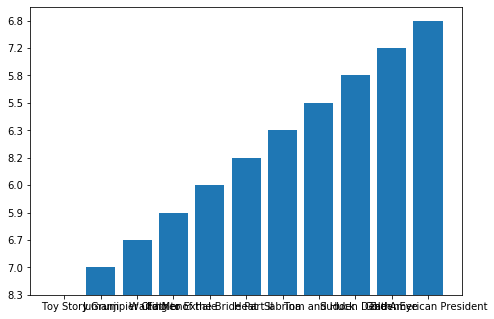

In [11]:
# links.csv fetch ids
# scraping data through ids
# name, rating collect and store in list
# showcase
def fetch_id(num) :
    df = pd.read_csv("links.csv")
    start = 0
    end = start + num+1
    list_movies = list(df.imdbId)
    return list_movies[start:end]
def scrape_id(list_movies):
    url = "https://www.imdb.com/title/tt{}".format(str(list_movies).zfill(7))
    response = requests.get(url)
    html_parse = bs4.BeautifulSoup(response.text,"html.parser")
    current_page_json = html_parse.find("script", attrs = {"type" : "application/ld+json"})
    current_page_json = str(current_page_json)[str(current_page_json).find('{'): -9]
    return current_page_json
def collect_parameters(list_movies):
    json_dict = json.loads(scrape_id(list_movies))
    movie ={
        "name" : json_dict['name'],
        "rating" : json_dict['aggregateRating']['ratingValue']}
    return movie
def show_case(list_movies =20):
    ids = fetch_id(list_movies)
    resultant_params = {"movies" : []}
    for i in ids :
        resultant_params["movies"].append(collect_parameters(i))
        return resultant_params

ids = fetch_id(10)
name = []
rating =[]
for i in ids:
    x = collect_parameters(i)
    name.append(x['name'])
    rating.append(x['rating'])
    print(x)
print(name)
print(rating)
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
ax.bar(name,rating)

plt.show()